In [26]:
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx
from tqdm import tqdm
from ipywidgets import *
import pickle
from Classes import *
from Functions import *


def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)   
def load_obj(name):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [2]:
n = 50
m = 1
s = 1
M  = np.array(n*[np.linspace(0 ,  m, n)])
S = np.array(n*[np.linspace(s,0.001, n)]).T

# Base Case

In [45]:
%matplotlib inline

<IPython.core.display.Javascript object>


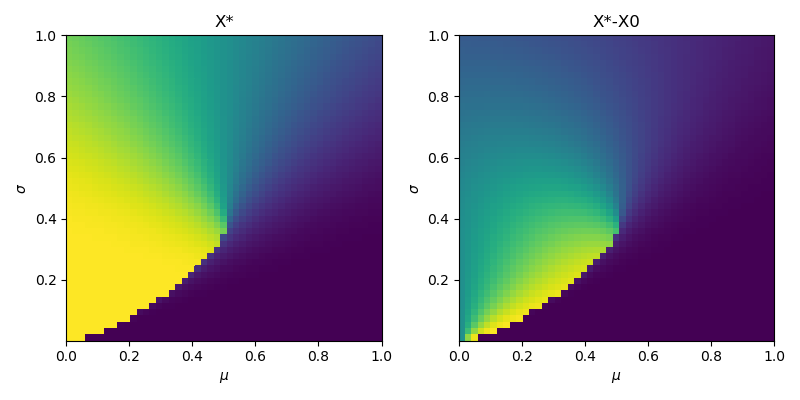

In [44]:
#BaseCase
M0 = M.copy()
S0 = S.copy()

X = norm.cdf(0,M,S)
X_ = X.copy()
for i in range(100):
    X  = norm.cdf(X,M,S)
    
Xbase = X.copy()
Xbasenet = X-X_
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.pcolormesh(M, S, Xbase,vmin = 0, vmax=1) 
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\sigma$')
ax1.set_title("X*")

ax2 = fig.add_subplot(1,2,2)
ax2.pcolormesh(M, S, Xbasenet,vmin = 0, vmax=1) 
ax2.set_xlabel(r'$\mu$')
ax2.set_ylabel(r'$\sigma$')
ax2.set_title("X*-X0")

fig.tight_layout()
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


0.9946070577648948

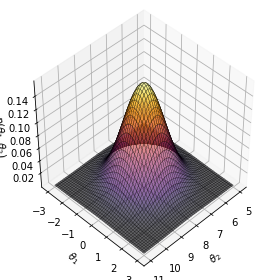

In [93]:
m = 0
shift = 8
m0 = m+shift
s = 1
s0=s
t = 3
num = 500 
theta1 = np.linspace(m-t*s,m+t*s,num)
theta2 = np.linspace(m0-t*s0,m0+t*s0,num)
theta1, theta2 = np.meshgrid(theta1,theta2)
pos = np.empty(theta1.shape + (2,))
pos[:, :, 0] = theta1; pos[:, :, 1] = theta2
rv = multivariate_normal([m, m0], [[s**2, 0], [0, s0**2]])
P= rv.pdf(pos)
fig = plt.figure(figsize = (4,4))
ax1 = fig.add_subplot( projection='3d')
ax1.plot_surface(theta2, theta1, P,cmap = "inferno",alpha = 0.6,linewidth=0.2, edgecolors='k')
ax1.set_xlabel(r'$\theta_2$')
ax1.set_ylabel(r'$\theta_1$')
ax1.set_zlabel(r'$p(\theta_1,\theta_2)$')
ax1.view_init(45, 45)

fig.tight_layout()
fig.show()
double_Integral(theta1, theta2, P)

probability coverage: 0.9990694998942554


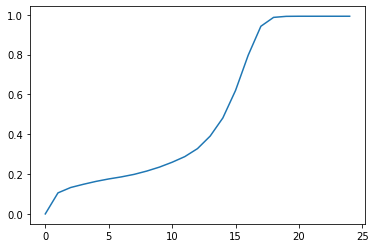

In [95]:
%matplotlib inline
num = 500
m = 0.25
shift = 0.2
s = 0.2
m0 = m+shift
s0 = s

typ = "out"

theta1 = np.linspace(m-3.5*s,m+3.5*s,num)
theta2 = np.linspace(m0-3.5*s0,m0+3.5*s0,num)
theta1, theta2 = np.meshgrid(theta1,theta2)
pos = np.empty(theta1.shape + (2,))
pos[:, :, 0] = theta1; pos[:, :, 1] = theta2
rv = multivariate_normal([m, m0], [[s**2, 0], [0, s0**2]])
P= rv.pdf(pos)

State_=[]
State = np.zeros(theta1.shape)

X_=[]
Xt_1 =-1
Xt_2 =-1
Xt_3 =-1
Xt   = double_Integral(theta1, theta2, State*P)
print("probability coverage:",double_Integral(theta1, theta2, P))
for i in range(100):
    X_.append(Xt)
    State_.append(State)
    if ((Xt==Xt_1) and (Xt_1==Xt_2) and (i%2==0)) or ((Xt==Xt_2)and (Xt_1==Xt_3)and (i%2==0)):
        break
    if typ == "out":
        State = (1-State)*(theta1 < Xt) + State*(theta2 > (1-Xt))
    if typ == "red":
        State = (1-State)*(theta1 < Xt) + State*(theta2 > ((1-Xt)/Xt))
    Xt_3 = Xt_2
    Xt_2 = Xt_1
    Xt_1 = Xt
    Xt = double_Integral(theta1, theta2, State*P)
fig,ax = plt.subplots()
ax.plot(X_)

In [73]:
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


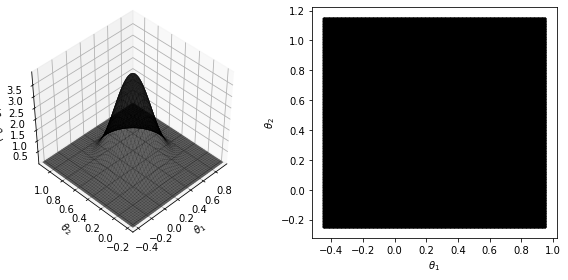

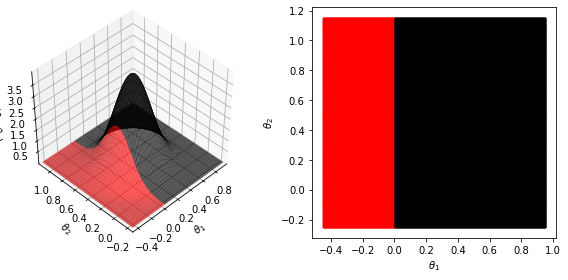

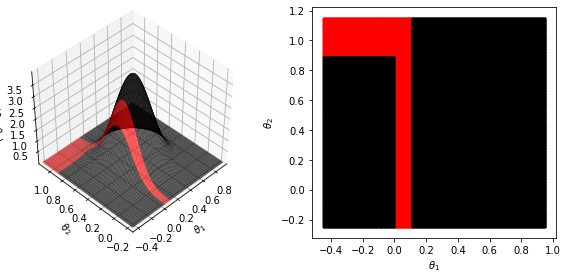

In [96]:
for i in range(3):
    col = np.full(State_[i].shape, "black")
    col[np.where(State_[i])]=["red"]

    fig = plt.figure(figsize = (8,4))
    if True:
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax1.plot_surface(theta1, theta2, P,facecolors=col,alpha = 0.6,linewidth=0.2, edgecolors='k')
        ax1.set_xlim(np.max(theta1), np.min(theta1)) #invert xaxis
        ax1.set_ylim(np.max(theta2), np.min(theta2)) #invert yaxis
        ax1.set_xlabel(r'$\theta_1$')
        ax1.set_ylabel(r'$\theta_2$')
        ax1.set_zlabel(r'$p(\theta_1,\theta_2)$')
        ax1.view_init(45, 45)
    ax2 = fig.add_subplot(1,2,2)
    healthy = np.where(1-State_[i])
    failed = np.where(State_[i])
    ax2.scatter(theta1[failed],  theta2[failed],  c = "red",   s = 0.35) 
    ax2.scatter(theta1[healthy], theta2[healthy], c = "black", s = 0.35) 
    ax2.set_xlabel(r'$\theta_1$')
    ax2.set_ylabel(r'$\theta_2$')

    fig.tight_layout()
    fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


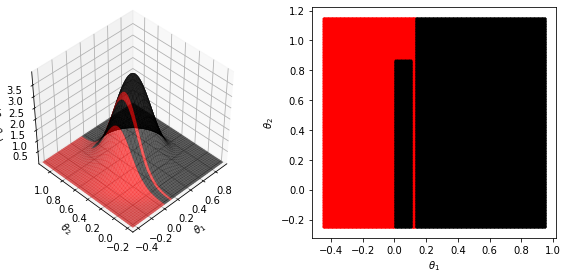

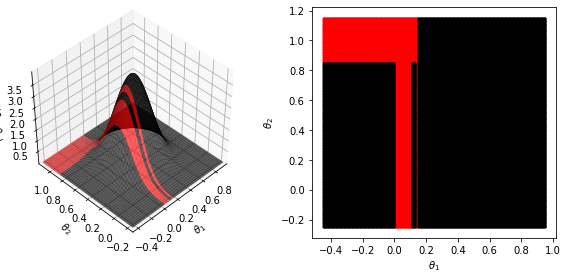

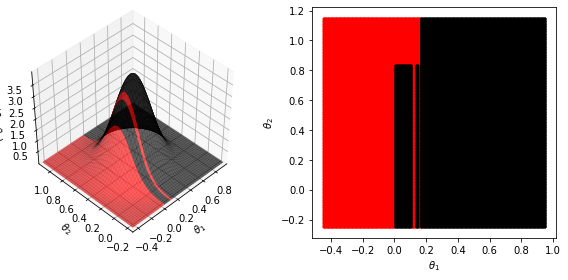

In [97]:
for i in range(3,6):
    col = np.full(State_[i].shape, "black")
    col[np.where(State_[i])]=["red"]

    fig = plt.figure(figsize = (8,4))
    if True:
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax1.plot_surface(theta1, theta2, P,facecolors=col,alpha = 0.6,linewidth=0.2, edgecolors='k')
        ax1.set_xlim(np.max(theta1), np.min(theta1)) #invert xaxis
        ax1.set_ylim(np.max(theta2), np.min(theta2)) #invert yaxis
        ax1.set_xlabel(r'$\theta_1$')
        ax1.set_ylabel(r'$\theta_2$')
        ax1.set_zlabel(r'$p(\theta_1,\theta_2)$')
        ax1.view_init(45, 45)
    ax2 = fig.add_subplot(1,2,2)
    healthy = np.where(1-State_[i])
    failed = np.where(State_[i])
    ax2.scatter(theta1[failed],  theta2[failed],  c = "red",   s = 0.35) 
    ax2.scatter(theta1[healthy], theta2[healthy], c = "black", s = 0.35) 
    ax2.set_xlabel(r'$\theta_1$')
    ax2.set_ylabel(r'$\theta_2$')

    fig.tight_layout()
    fig.show()

# Load Results

In [76]:
ResultsSim = load_obj("ResultsSim")
temp = load_obj("ResultsSim1")
ResultsSim.update(temp)
temp = load_obj("ResultsSim2")
ResultsSim.update(temp)

In [77]:
ResultsAna = load_obj("ResultsAna")

In [78]:
shifts = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,1,1.25,1.5,1.75,2,2.5,3,3.5,4,5,8,10]

# Plot Results

In [87]:
def plot_X(X,ax):    
    ax.pcolormesh(M, S, X,vmin = 0, vmax=1,rasterized=True) 
    return
def plot_contour(X,X_1,ax,cut=0.01, Levels = 3,Contour="Xbase"):
    if Contour == "Xbase":
        Xcontour = Xbase.copy()
    elif Contour == "Xbasenet":
        Xcontour = Xbasenet.copy()
    else:
        Xcontour = (M<Contour)*(S<Contour)
    if Levels == 2:
        levels = [cut]
    else:
        levels = [cut,(1-cut)]    
    ax.contour(M, S, Xcontour, levels = levels,colors="darkorange",linewidths = 1)
    ax.contour(M, S, X,        levels = levels,colors="k",linewidths = 1)
    diff=abs(X-X_1)
    diff[-1][-1]=1
    #ax.contour(M, S, diff, levels = [0.05],colors="w",linewidths = 1)
    return

def contour_count(cut, X,X_1,Contour="Xbase"):
    if Contour == "Xbase":
        Xlist = Xbase > cut
        Xsize = np.sum(Xlist)
    elif Contour == "Xbasenet":
        Xlist = Xbasenet > cut
        Xsize = np.sum(Xlist)
    else:
        Xlist = (M<Contour)*(S<Contour)
        Xsize = np.sum(Xlist)
    Y = X + X_1    
    Z = np.array([np.sum((y<2*cut)*Xlist)/Xsize for y in Y])
    O  = np.array([np.sum((y>2*(1-cut))*Xlist)/Xsize for y in Y])
    MIX  =1-Z-O
    F = np.array([np.sum((abs(diff)<0.05)*Xlist)/Xsize for diff in X-X_1])
    Z0= np.sum(Xbase[Xlist]<cut)/Xsize
    O0 = np.sum(Xbase[Xlist]>1-cut)/Xsize
    M0 = 1-Z0-O0
    return Z,O,MIX,F,Z0,O0,M0

def plot_stats(ax, X, X_1, cut=0.2, Contour="Xbase", xlim = 1, label = False):
    Z,O,M,F,Z0,O0,M0 = contour_count(cut, X,X_1,Contour)
    ax.plot(shifts, Z, label = label*"zero")
    ax.plot(shifts, O, label = label*"one")
    ax.plot(shifts, M, label = label*"mix")
    ax.plot(shifts, [1-i for i  in F], label = label*"fluc", color = "black", linestyle = "dashed")
    ax.plot(shifts, F, label = label*"equi", color = "black", linestyle = "dotted")
    ax.hlines(Z0,0,xlim, linestyle = "dotted", color = "blue",label =  label*"Z0")
    ax.hlines(O0,0,xlim, linestyle = "dashed", color = "orange", label = label*"O0")
    ax.hlines(M0,0,xlim, linestyle = "dashdot", color = "green", label = label*"M0")
    ax.grid()
    ax.set_xlim((0,xlim))
    return


In [8]:
%matplotlib notebook


<IPython.core.display.Javascript object>


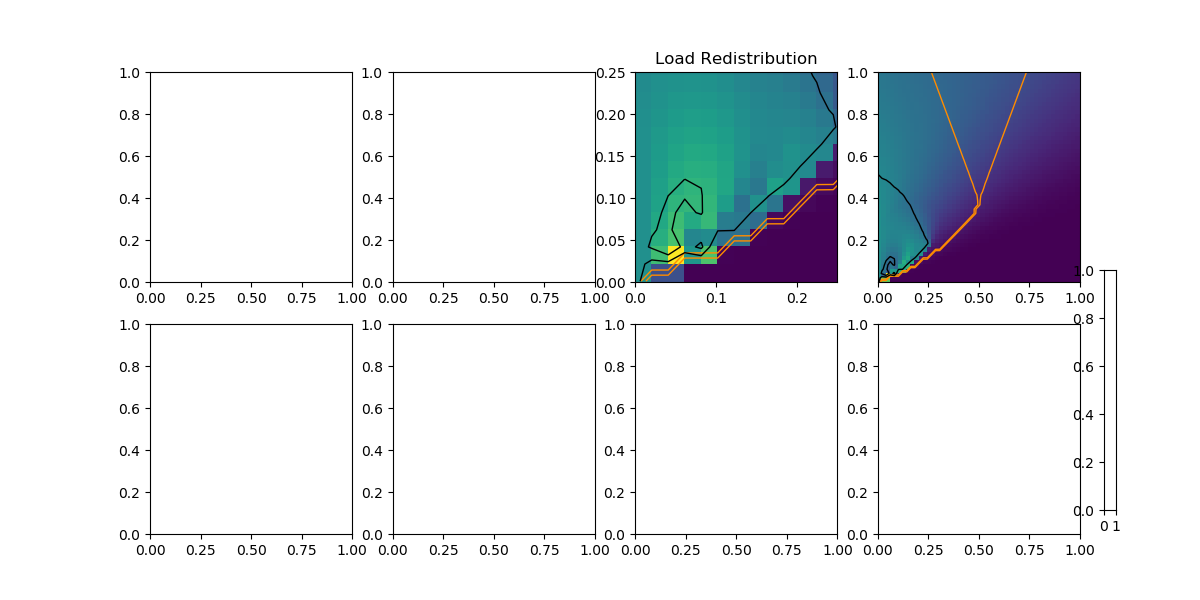

interactive(children=(IntSlider(value=0, description='Mshift', max=30), FloatSlider(value=0.35, description='c…

In [88]:
%matplotlib notebook
cyc = True
if not cyc:
    fig1, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (8,8))
else:
    fig1, ((ax1,ax1_,ax2,ax2_),(ax3,ax3_,ax4,ax4_)) = plt.subplots(2,4, figsize = (12,6))
fig1.subplots_adjust(right=0.9)
cbar_ax = fig1.add_axes([0.92, 0.15, 0.01, 0.4])
#fig1.colorbar(ax1.pcolormesh(M, S, X,vmin = 0, vmax=1,rasterized=True) , cax=cbar_ax)


def update(Mshift=IntSlider(min=0, max=len(shifts)-1, step=1, value=0),cut=FloatSlider(min=0.05, max=0.49, step=0.025, value=0.35),Contour=['Xbase',"Xbasenet",0.1,0.2,0.25,0.3],Levels=[3,2]):        
    """
    ###ANALYTICAL###
    #Constant Load 
    #X   = ResultsAna[shifts[Mshift]]["out"][-2]
    #X_1 = ResultsAna[shifts[Mshift]]["out"][-1]
    X =np.array([[X[-1] for X in results] for results in ResultsAna[shifts[Mshift]]["out"]])
    X_1 =np.array([[X[-2] for X in results] for results in ResultsAna[shifts[Mshift]]["out"]])
    ax1.clear()
    ax1.set_title("Constant Load")
    ax1.set_ylabel("Analytical")
    plot_X(X,ax1)
    plot_contour(X,X_1,ax1,cut,Levels,Contour)
    if cyc:
        ax1_.clear()
        plot_X(X_1,ax1_)
        plot_contour(X,X_1,ax1_,cut,Levels,Contour)
        """
    #Load Redistribution
    #X   = ResultsAna[shifts[Mshift]]["red"][-2]
    #X_1 = ResultsAna[shifts[Mshift]]["red"][-1]
    X =np.array([[X[-1] for X in results] for results in ResultsAna[shifts[Mshift]]["red"]])
    X_1 =np.array([[X[-2] for X in results] for results in ResultsAna[shifts[Mshift]]["red"]])
    ax2.clear()
    ax2.set_title("Load Redistribution")
    plot_X(X,ax2)
    plot_contour(X,X_1,ax2,cut,Levels,Contour)
    if cyc:
        ax2_.clear()
        plot_X(X_1,ax2_)
        plot_contour(X,X_1,ax2_,cut,Levels,Contour)
    ax2.set_xlim((0,0.25))
    ax2.set_ylim((0,0.25))
    """
    ###SIMULATION###
    #Constant Load 
    X =np.array([[X[-1] for X in results] for results in ResultsSim[shifts[Mshift]]["out"]])
    X_1 =np.array([[X[-2] for X in results] for results in ResultsSim[shifts[Mshift]]["out"]])
    ax3.clear()
    ax3.set_ylabel("Simulation")
    plot_X(X,ax3)
    plot_contour(X,X_1,ax3,cut,Levels,Contour)
    if cyc:
        ax3_.clear()
        plot_X(X_1,ax3_)
        plot_contour(X,X_1,ax3_,cut,Levels,Contour)
    
    #Load Redistribution
    X =np.array([[X[-1] for X in results] for results in ResultsSim[shifts[Mshift]]["red"]])
    X_1 =np.array([[X[-2] for X in results] for results in ResultsSim[shifts[Mshift]]["red"]])
    ax4.clear()
    plot_X(X,ax4)
    plot_contour(X,X_1,ax4,cut,Levels,Contour)
    if cyc:
        ax4_.clear()
        plot_X(X_1,ax4_)
        plot_contour(X,X_1,ax4_,cut,Levels,Contour)
        """
    fig1.canvas.draw_idle()
    fig1.canvas.set_window_title("Mshift = "+str(shifts[Mshift]))
    

interact(update);

<IPython.core.display.Javascript object>


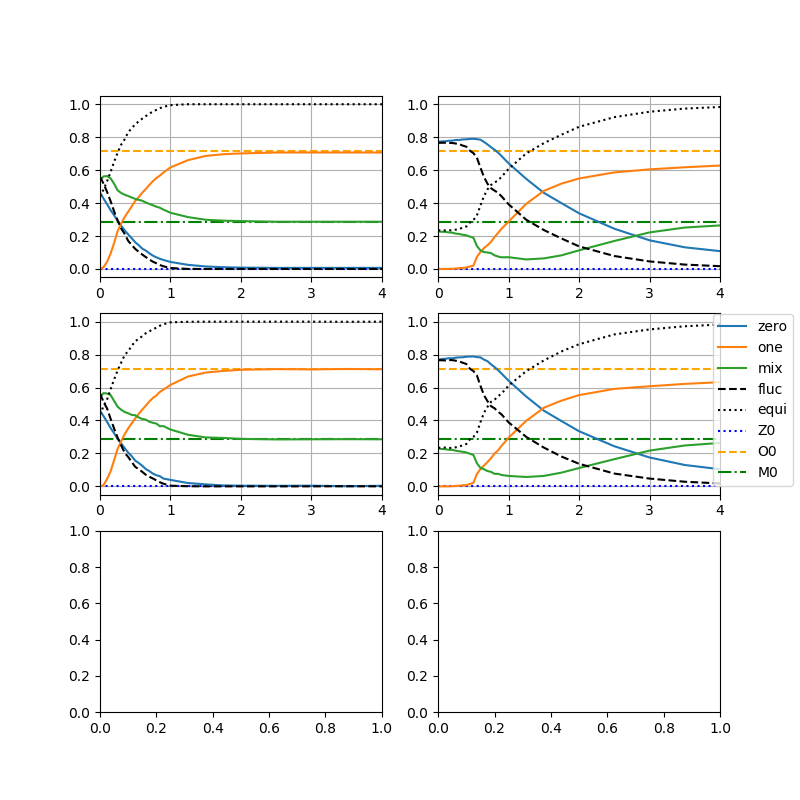

interactive(children=(FloatSlider(value=0.35, description='cut', max=0.49, min=0.05, step=0.025), Dropdown(des…

In [89]:
%matplotlib notebook

XTensor={"Ana":{"out":[], "red":[]},"Sim":{"out":[], "red":[]}}
for phi in ["out", "red"]:
    #XTensor["Ana"][phi].append(np.array([ResultsAna[shift][phi][-2] for shift in shifts]))
    #XTensor["Ana"][phi].append(np.array([ResultsAna[shift][phi][-1] for shift in shifts]))
    XTensor["Ana"][phi].append(np.array([[[X[-1] for X in results] for results in ResultsAna[shift][phi]] for shift in shifts]))
    XTensor["Ana"][phi].append(np.array([[[X[-2] for X in results] for results in ResultsAna[shift][phi]] for shift in shifts]))
    XTensor["Sim"][phi].append(np.array([[[X[-1] for X in results] for results in ResultsSim[shift][phi]] for shift in shifts]))
    XTensor["Sim"][phi].append(np.array([[[X[-2] for X in results] for results in ResultsSim[shift][phi]] for shift in shifts]))

    

fig2,((bx1,bx2),(bx3,bx4),(bx5,bx6)) = plt.subplots(3,2, figsize = (8,8))
plot_stats(bx1, XTensor["Ana"]["out"][0],XTensor["Ana"]["out"][1], label = True)
fig2.legend(loc=7)
fig2.show()

def update1(cut=FloatSlider(min=0.05, max=0.49, step=0.025, value=0.35),Contour=['Xbase',"Xbasenet",0.1,0.2,0.25,0.3],xlim=IntSlider(min=1, max=100, step=3, value=0)):        
    ###ANALYTICAL###
   
    bx1.clear()
    bx2.clear()
    plot_stats(bx1, XTensor["Ana"]["out"][0],XTensor["Ana"]["out"][1], cut, Contour, xlim)
    plot_stats(bx2, XTensor["Ana"]["red"][0],XTensor["Ana"]["red"][1], cut, Contour, xlim)
    
    
    bx3.clear()
    bx4.clear()
    plot_stats(bx3, XTensor["Sim"]["out"][0],XTensor["Sim"]["out"][1], cut, Contour, xlim)
    plot_stats(bx4, XTensor["Sim"]["red"][0],XTensor["Sim"]["red"][1], cut, Contour, xlim)
    
    
    bx5.clear()
    bx6.clear()
    
    fig2.canvas.draw_idle()
    fig2.canvas.set_window_title("Cut = "+str(cut))

interact(update1);